Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

1. Load the data set

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).

-----------------------------------------------------

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

-----------------------------------------------------

Citation Request:

If you use this dataset, please cite the following paper: 
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# 1. Load the data set

In [2]:
df = pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
# check info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
#check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
#check for null
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [6]:
# shape
df.shape

(195, 24)

In [7]:
# columns
print(df.columns)
print(df.columns.size)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
24


In [8]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,195,195,phon_R01_S25_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fo(Hz),195,NaN,NaN,NaN,154.229,41.3901,88.333,117.572,148.79,182.769,260.105
MDVP:Fhi(Hz),195,NaN,NaN,NaN,197.105,91.4915,102.145,134.863,175.829,224.206,592.03
MDVP:Flo(Hz),195,NaN,NaN,NaN,116.325,43.5214,65.476,84.291,104.315,140.019,239.17
MDVP:Jitter(%),195,NaN,NaN,NaN,0.00622046,0.00484813,0.00168,0.00346,0.00494,0.007365,0.03316
MDVP:Jitter(Abs),195,NaN,NaN,NaN,4.3959e-05,3.48219e-05,7e-06,2e-05,3e-05,6e-05,0.00026
MDVP:RAP,195,NaN,NaN,NaN,0.00330641,0.00296777,0.00068,0.00166,0.0025,0.003835,0.02144
MDVP:PPQ,195,NaN,NaN,NaN,0.00344636,0.00275898,0.00092,0.00186,0.00269,0.003955,0.01958
Jitter:DDP,195,NaN,NaN,NaN,0.00991995,0.00890334,0.00204,0.004985,0.00749,0.011505,0.06433
MDVP:Shimmer,195,NaN,NaN,NaN,0.0297091,0.0188569,0.00954,0.016505,0.02297,0.037885,0.11908


# 2. univariate and Bivariate analysis 

### Analysis of MDVP:Fo(Hz) - Average vocal fundamental frequency

Text(0, 0.5, 'Frequency')

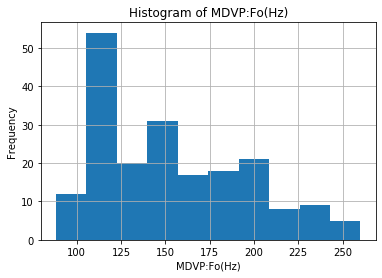

In [9]:
df['MDVP:Fo(Hz)'].hist()
plt.title('Histogram of MDVP:Fo(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')

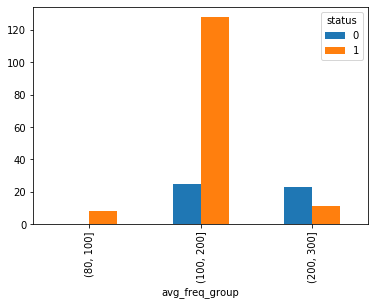

In [10]:
df_1 = df.copy(deep=True)
df_1['avg_freq_group'] = pd.cut(x=df_1['MDVP:Fo(Hz)'],bins=[80,100,200,300,400,500,600,700])
pd.crosstab(df_1['avg_freq_group'],df_1['status']).plot(kind='bar')

### Analysis of MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

Text(0, 0.5, 'Frequency')

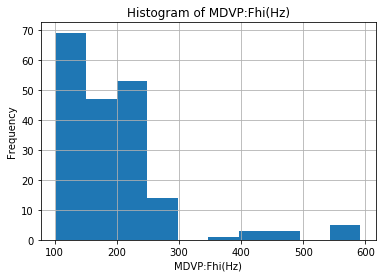

In [11]:
df['MDVP:Fhi(Hz)'].hist()
plt.title('Histogram of MDVP:Fhi(Hz)')
plt.xlabel('MDVP:Fhi(Hz)')
plt.ylabel('Frequency')

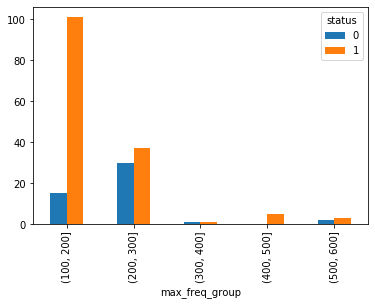

In [12]:
df_2 = df.copy(deep=True)
df_2['max_freq_group'] = pd.cut(x=df_2['MDVP:Fhi(Hz)'],bins=[80,100,200,300,400,500,600,700])
pd.crosstab(df_2['max_freq_group'],df_2['status']).plot(kind='bar')

### Analysis of MDVP:Flo(Hz) - Minimum vocal fundamental frequency

Text(0, 0.5, 'Frequency')

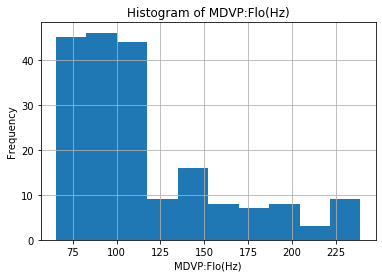

In [13]:
df['MDVP:Flo(Hz)'].hist()
plt.title('Histogram of MDVP:Flo(Hz)')
plt.xlabel('MDVP:Flo(Hz)')
plt.ylabel('Frequency')

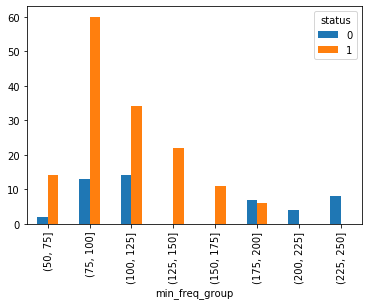

In [14]:
df_3 = df.copy(deep=True)
df_3['min_freq_group'] = pd.cut(x=df_3['MDVP:Flo(Hz)'],bins=[50,75,100,125,150,175,200,225,250])
pd.crosstab(df_3['min_freq_group'],df_3['status']).plot(kind='bar')

### Observations
#### 1. Average Frequency looks to be a good feature, as the average frequency is lower more the chances of parkinson diagnosis
#### 2. when the frequency range is from 100 to 200, we see that the most no of people are diagnosed with parkinson
#### 3.  All below frequency suggest the same behavior 
####     a. MDVP:Fo(Hz) - Average vocal fundamental frequency
####     b. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
####     c. MDVP:Flo(Hz) - Minimum vocal fundamental frequency

### Analysis of MDVP:Jitter(%)

Text(0, 0.5, 'Frequency')

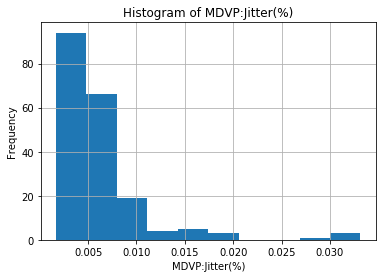

In [15]:
df['MDVP:Jitter(%)'].hist()
plt.title('Histogram of MDVP:Jitter(%)')
plt.xlabel('MDVP:Jitter(%)')
plt.ylabel('Frequency')

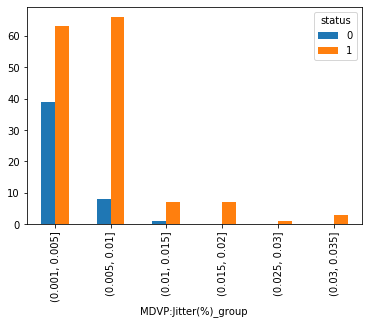

In [16]:
df_4 = df.copy(deep=True)
df_4['MDVP:Jitter(%)_group'] = pd.cut(x=df_4['MDVP:Jitter(%)'],bins=[0.001,0.005,0.010,0.015,0.020,0.025,0.030,0.035])
pd.crosstab(df_4['MDVP:Jitter(%)_group'],df_4['status']).plot(kind='bar')

### Analysis of MDVP:Jitter(Abs)

Text(0, 0.5, 'Frequency')

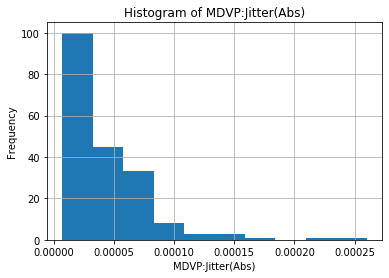

In [17]:
df['MDVP:Jitter(Abs)'].hist()
plt.title('Histogram of MDVP:Jitter(Abs)')
plt.xlabel('MDVP:Jitter(Abs)')
plt.ylabel('Frequency')

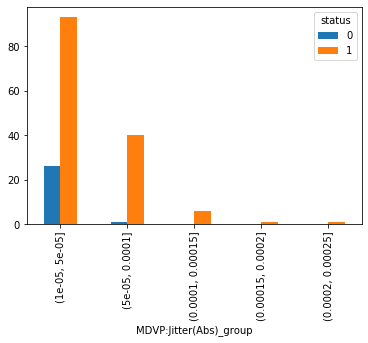

In [18]:
df_5 = df.copy(deep=True)
df_5['MDVP:Jitter(Abs)_group'] = pd.cut(x=df_5['MDVP:Jitter(Abs)'],bins=[0.00001,0.00005,0.00010,0.00015,0.00020,0.00025])
pd.crosstab(df_5['MDVP:Jitter(Abs)_group'],df_5['status']).plot(kind='bar')

### Analysis of MDVP:RAP

Text(0, 0.5, 'Frequency')

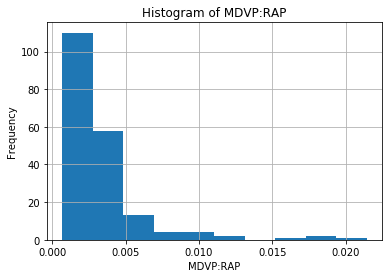

In [19]:
df['MDVP:RAP'].hist()
plt.title('Histogram of MDVP:RAP')
plt.xlabel('MDVP:RAP')
plt.ylabel('Frequency')

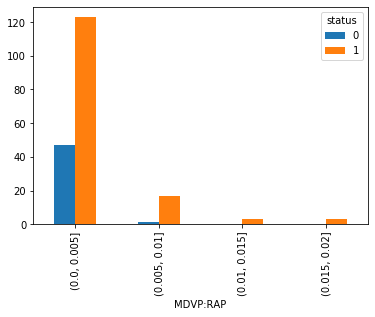

In [20]:
df_6 = df.copy(deep=True)
df_6['MDVP:RAP'] = pd.cut(x=df_6['MDVP:RAP'],bins=[0.000,0.005,0.010,0.015,0.020])
pd.crosstab(df_6['MDVP:RAP'],df_6['status']).plot(kind='bar')

### Analysis of MDVP:PPQ

Text(0, 0.5, 'Frequency')

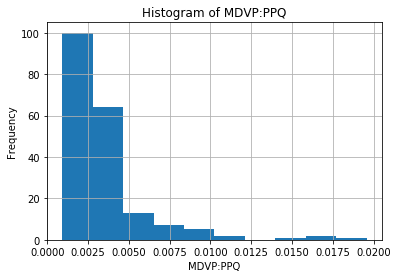

In [21]:
df['MDVP:PPQ'].hist()
plt.title('Histogram of MDVP:PPQ')
plt.xlabel('MDVP:PPQ')
plt.ylabel('Frequency')

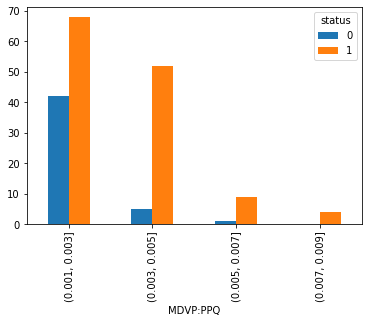

In [22]:
df_7 = df.copy(deep=True)
df_7['MDVP:PPQ'] = pd.cut(x=df_7['MDVP:PPQ'],bins=[0.001,0.003,0.005,0.007,0.009])
pd.crosstab(df_7['MDVP:PPQ'],df_7['status']).plot(kind='bar')

### Jitter:DDP

Text(0, 0.5, 'Frequency')

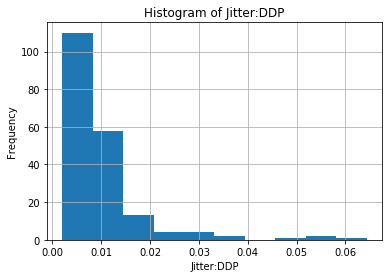

In [23]:
df['Jitter:DDP'].hist()
plt.title('Histogram of Jitter:DDP')
plt.xlabel('Jitter:DDP')
plt.ylabel('Frequency')

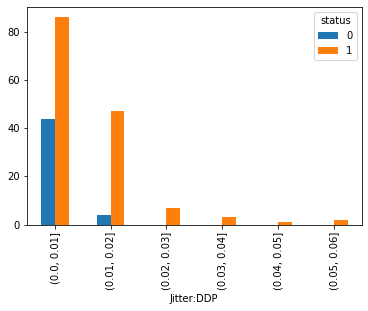

In [24]:
df_7 = df.copy(deep=True)
df_7['Jitter:DDP'] = pd.cut(x=df_7['Jitter:DDP'],bins=[0.00,0.01,0.02,0.03,0.04,0.05,0.06])
pd.crosstab(df_7['Jitter:DDP'],df_7['status']).plot(kind='bar')

### Observations

#### 1. Looks like Jitter is a good indicator as increase in jitter values the % of people having PD reduces

### Analysis of MDVP:Shimmer

Text(0, 0.5, 'Frequency')

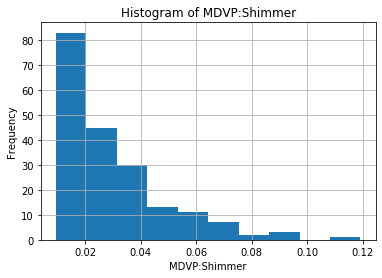

In [25]:
df['MDVP:Shimmer'].hist()
plt.title('Histogram of MDVP:Shimmer')
plt.xlabel('MDVP:Shimmer')
plt.ylabel('Frequency')

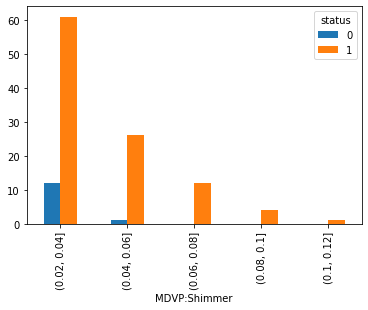

In [26]:
df_new = df.copy(deep=True)
df_new['MDVP:Shimmer'] = pd.cut(x=df_new['MDVP:Shimmer'],bins=[0.02,0.04,0.06,0.08,0.10,0.12])
pd.crosstab(df_new['MDVP:Shimmer'],df_new['status']).plot(kind='bar')

### Analysis of MDVP:Shimmer(dB)

Text(0, 0.5, 'Frequency')

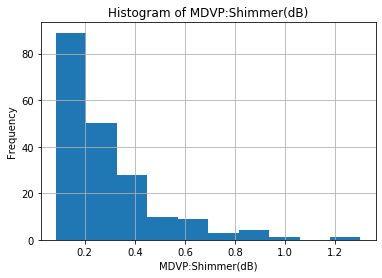

In [27]:
df['MDVP:Shimmer(dB)'].hist()
plt.title('Histogram of MDVP:Shimmer(dB)')
plt.xlabel('MDVP:Shimmer(dB)')
plt.ylabel('Frequency')

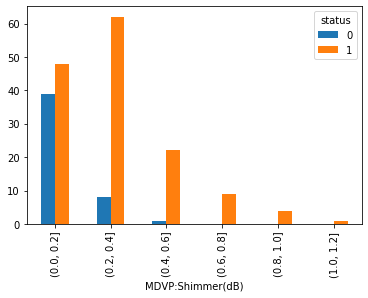

In [28]:
df_new['MDVP:Shimmer(dB)'] = pd.cut(x=df_new['MDVP:Shimmer(dB)'],bins=[0.0,0.2,0.4,0.6,0.8,1.0,1.2])
pd.crosstab(df_new['MDVP:Shimmer(dB)'],df_new['status']).plot(kind='bar')

### Analysis of Shimmer:APQ3

Text(0, 0.5, 'Frequency')

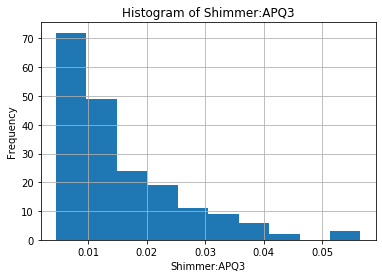

In [29]:
df['Shimmer:APQ3'].hist()
plt.title('Histogram of Shimmer:APQ3')
plt.xlabel('Shimmer:APQ3')
plt.ylabel('Frequency')

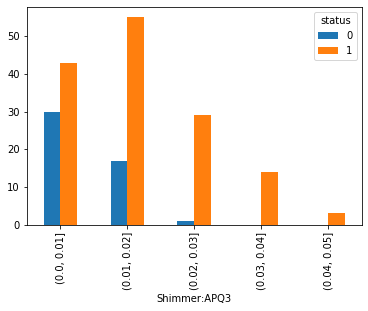

In [30]:
df_new['Shimmer:APQ3'] = pd.cut(x=df_new['Shimmer:APQ3'],bins=[0.00,0.01,0.02,0.03,0.04,0.05])
pd.crosstab(df_new['Shimmer:APQ3'],df_new['status']).plot(kind='bar')

### Analysis of Shimmer:APQ5

Text(0, 0.5, 'Frequency')

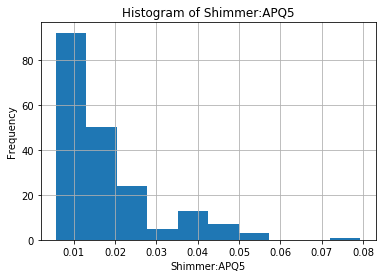

In [31]:
df['Shimmer:APQ5'].hist()
plt.title('Histogram of Shimmer:APQ5')
plt.xlabel('Shimmer:APQ5')
plt.ylabel('Frequency')

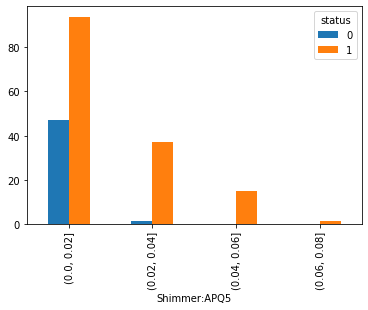

In [32]:
df_new['Shimmer:APQ5'] = pd.cut(x=df_new['Shimmer:APQ5'],bins=[0.00,0.02,0.04,0.06,0.08,0.1])
pd.crosstab(df_new['Shimmer:APQ5'],df_new['status']).plot(kind='bar')

### Analysis of MDVP:APQ

Text(0, 0.5, 'Frequency')

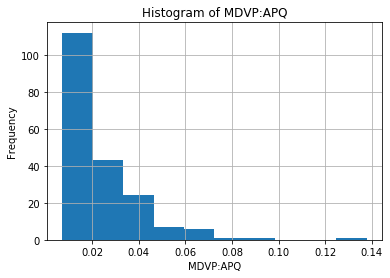

In [33]:
df['MDVP:APQ'].hist()
plt.title('Histogram of MDVP:APQ')
plt.xlabel('MDVP:APQ')
plt.ylabel('Frequency')

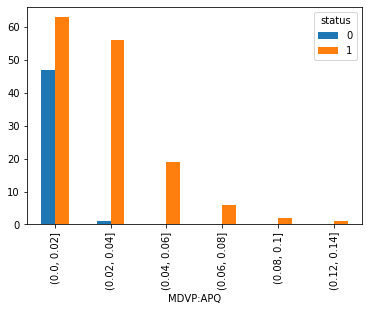

In [34]:
df_new['MDVP:APQ'] = pd.cut(x=df_new['MDVP:APQ'],bins=[0.00,0.02,0.04,0.06,0.08,0.1,0.12,0.14])
pd.crosstab(df_new['MDVP:APQ'],df_new['status']).plot(kind='bar')

### Analysis of Shimmer:DDA

Text(0, 0.5, 'Frequency')

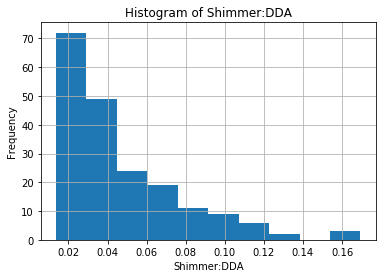

In [35]:
df['Shimmer:DDA'].hist()
plt.title('Histogram of Shimmer:DDA')
plt.xlabel('Shimmer:DDA')
plt.ylabel('Frequency')

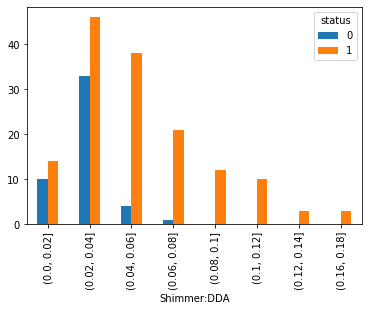

In [36]:
df_new['Shimmer:DDA'] = pd.cut(x=df_new['Shimmer:DDA'],bins=[0.00,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18])
pd.crosstab(df_new['Shimmer:DDA'],df_new['status']).plot(kind='bar')

### Observations 
#### 1. so if the aplitude levels are around 0.02 to 0.05 it is quites evident that the person may be disgnosed with PD

### Analysis of NHR

Text(0, 0.5, 'Frequency')

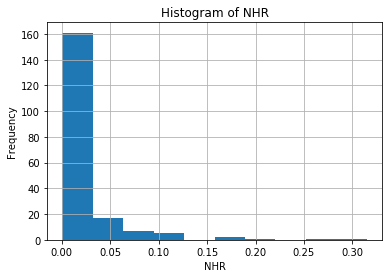

In [37]:
df['NHR'].hist()
plt.title('Histogram of NHR')
plt.xlabel('NHR')
plt.ylabel('Frequency')

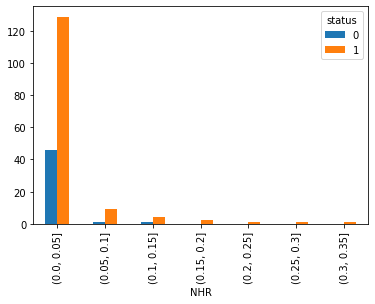

In [38]:
df_new['NHR'] = pd.cut(x=df_new['NHR'],bins=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35])
pd.crosstab(df_new['NHR'],df_new['status']).plot(kind='bar')

### Analysis of HNR

Text(0, 0.5, 'Frequency')

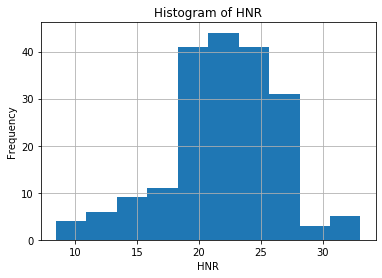

In [39]:
df['HNR'].hist()
plt.title('Histogram of HNR')
plt.xlabel('HNR')
plt.ylabel('Frequency')


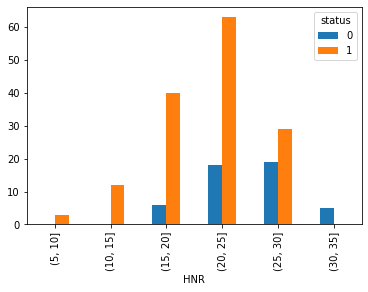

In [40]:
df_new['HNR'] = pd.cut(x=df_new['HNR'],bins=[5,10,15,20,25,30,35])
pd.crosstab(df_new['HNR'],df_new['status']).plot(kind='bar')

### Observations - NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#### if NHR is in the range of 0.00 to 0.05 there is high probability of PD
####  if HNR is in the range of 15 to 25 there is high probability of PD

### Analysis of RPDE

Text(0, 0.5, 'Frequency')

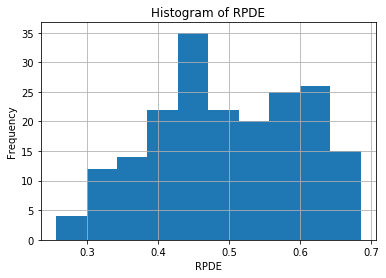

In [41]:
df['RPDE'].hist()
plt.title('Histogram of RPDE')
plt.xlabel('RPDE')
plt.ylabel('Frequency')

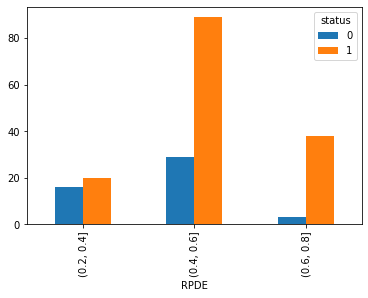

In [42]:
df_new['RPDE'] = pd.cut(x=df_new['RPDE'],bins=[0.2,0.4,0.6,0.8])
pd.crosstab(df_new['RPDE'],df_new['status']).plot(kind='bar')

### Analysis of DFA

Text(0, 0.5, 'Frequency')

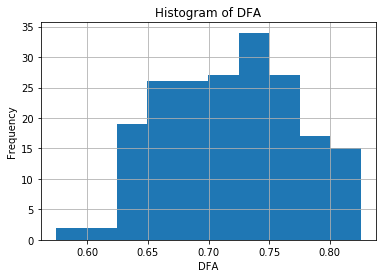

In [43]:
df['DFA'].hist()
plt.title('Histogram of DFA')
plt.xlabel('DFA')
plt.ylabel('Frequency')

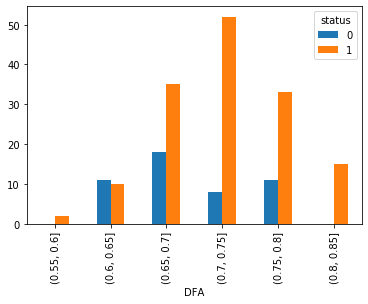

In [44]:
df_new['DFA'] = pd.cut(x=df_new['DFA'],bins=[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85])
pd.crosstab(df_new['DFA'],df_new['status']).plot(kind='bar')

### Analysis of spread1

Text(0, 0.5, 'Frequency')

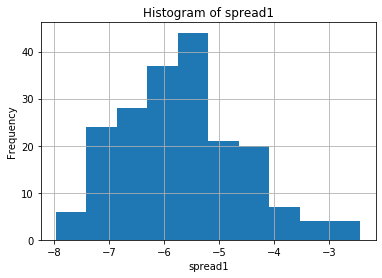

In [45]:
df['spread1'].hist()
plt.title('Histogram of spread1')
plt.xlabel('spread1')
plt.ylabel('Frequency')

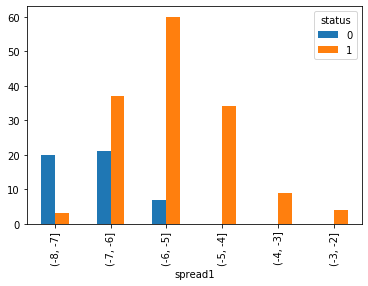

In [46]:
df_new['spread1'] = pd.cut(x=df_new['spread1'],bins=[-8,-7,-6,-5,-4,-3,-2])
pd.crosstab(df_new['spread1'],df_new['status']).plot(kind='bar')

### Analysis of spread2

Text(0, 0.5, 'Frequency')

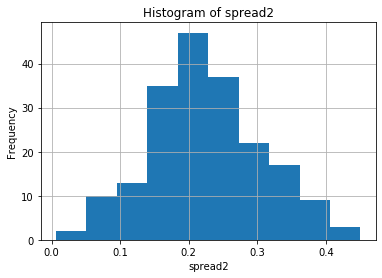

In [47]:
df['spread2'].hist()
plt.title('Histogram of spread2')
plt.xlabel('spread2')
plt.ylabel('Frequency')

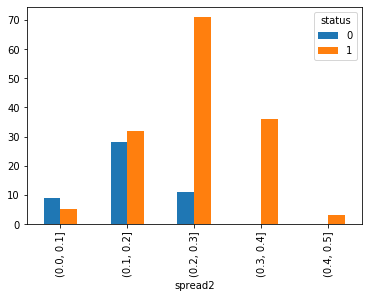

In [48]:
df_new['spread2'] = pd.cut(x=df_new['spread2'],bins=[0.0,0.1,0.2,0.3,0.4,0.5])
pd.crosstab(df_new['spread2'],df_new['status']).plot(kind='bar')

### Analysis of D2

Text(0, 0.5, 'Frequency')

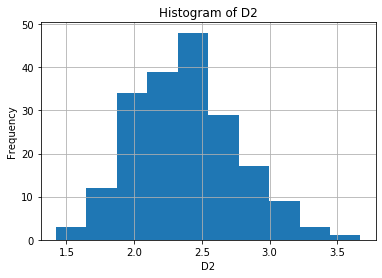

In [49]:
df['D2'].hist()
plt.title('Histogram of D2')
plt.xlabel('D2')
plt.ylabel('Frequency')

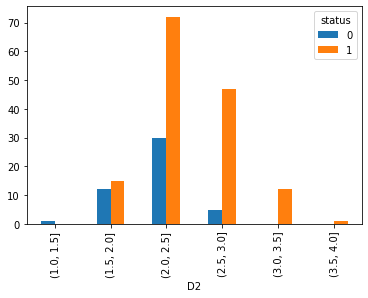

In [50]:
df_new['D2'] = pd.cut(x=df_new['D2'],bins=[0.0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0])
pd.crosstab(df_new['D2'],df_new['status']).plot(kind='bar')

### Analysis of PPE

Text(0, 0.5, 'Frequency')

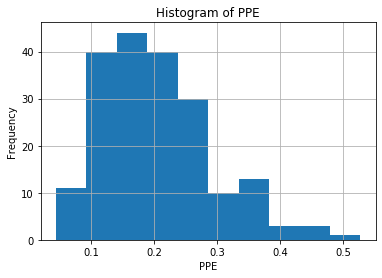

In [51]:
df['PPE'].hist()
plt.title('Histogram of PPE')
plt.xlabel('PPE')
plt.ylabel('Frequency')

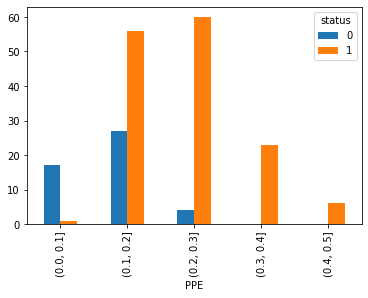

In [52]:
df_new['PPE'] = pd.cut(x=df_new['PPE'],bins=[0.0,0.1,0.2,0.3,0.4,0.5])
pd.crosstab(df_new['PPE'],df_new['status']).plot(kind='bar')

### Observation 
#### 1.  ppe, spread1, spread2 looks dependent variables for the parkinsons prediction. As these values increases the probability increases.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


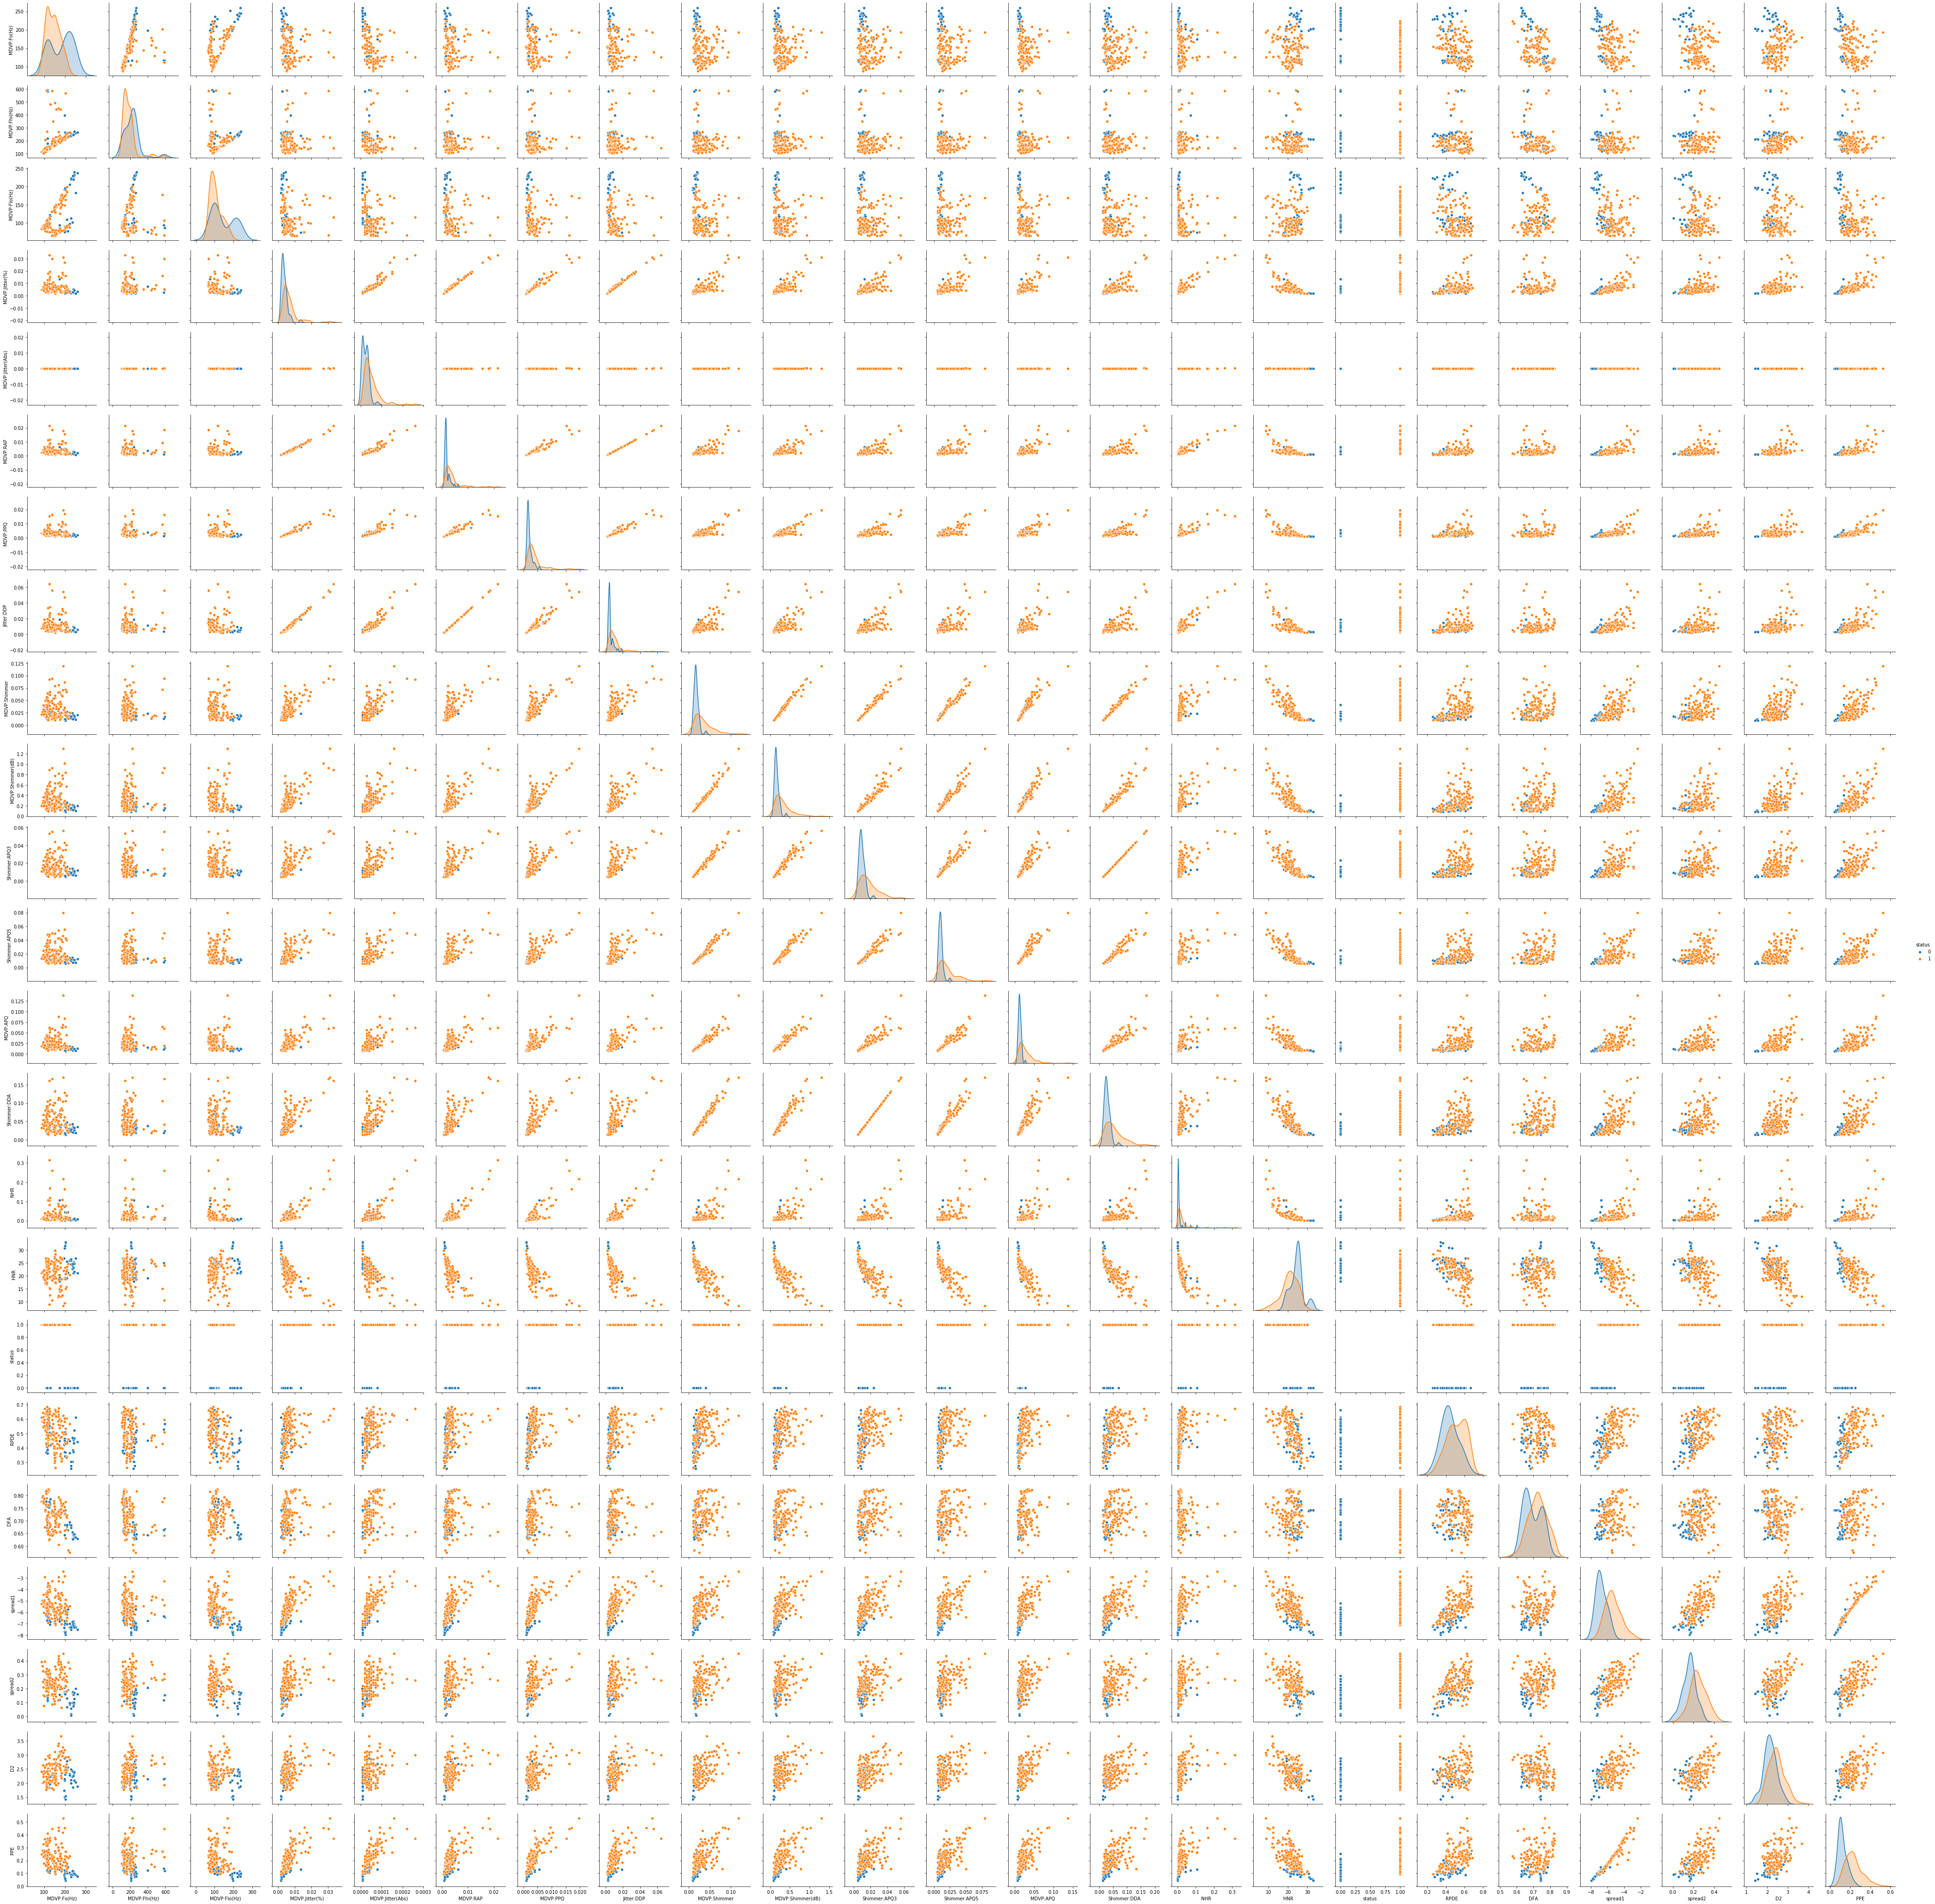

In [54]:
sns.pairplot(df,hue='status')

In [57]:
df_copy = df.copy(deep=True)
df = df_copy.copy(deep=True)

In [58]:
# we can drop name column as it has not influence on the output prediction
X = df.drop(columns='name')
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)


In [59]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X = X.drop(columns='status')
X
y = df.loc[:,'status']

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)






## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [60]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [61]:
dt_model.score(test_set , test_labels)      # performance on test data

0.8813559322033898

In [62]:
test_pred = dt_model.predict(test_set)
test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [63]:
pd.crosstab(test_labels, test_pred, margins=True)

col_0,0,1,All
status,,,
0,13,6,19
1,1,39,40
All,14,45,59


In [64]:
from sklearn import metrics
metrics.confusion_matrix(test_labels, test_pred)

array([[13,  6],
       [ 1, 39]])

In [65]:
print("classification report: \n", metrics.classification_report(test_labels, test_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.87      0.97      0.92        40

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



In [66]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
parkinson_Tree_File = open('Parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=parkinson_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

parkinson_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.040734
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.079409
spread1           0.000000
spread2           0.000000
D2                0.067644
PPE               0.387263


## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [67]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,min_samples_leaf=5)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
parkinsons_tree_regularized = open('Parkinson_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= parkinsons_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

parkinsons_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
MDVP:Fo(Hz)       0.166071
MDVP:Fhi(Hz)      0.165015
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.123814
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.092755
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.452346


In [118]:
test_pred = dt_model.predict(test_set)
dt_model.score(test_set , test_labels)

0.9152542372881356

In [120]:
print("classification report: \n", metrics.classification_report(test_labels, test_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



## Observation 

### setting max_depth = 3,min_samples_leaf=5 the accuracy has increased from 0.8813559322033898(88%) to 
### 0.9152542372881356(91%) increase in 3% accuracy

## 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)
## Ensemble RandomForest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier ## uncomment this line to see the description fo the RandomForestClassifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 41,criterion = 'entropy')
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.864406779661017

In [169]:
param = {'n_estimators': [10,50,100,200,500], 
         'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
         }

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
gs = GridSearchCV(RandomForestClassifier(), param_grid=param,cv=5,scoring='accuracy')

In [172]:
bestF = gs.fit(train_set,train_labels)
bestF

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [173]:
gs.best_params_

{'max_features': 3, 'n_estimators': 500}

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',max_features=3)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8305084745762712

In [175]:
print("classification report: \n", metrics.classification_report(test_labels, test_pred))

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        19
           1       0.80      1.00      0.89        40

    accuracy                           0.83        59
   macro avg       0.90      0.74      0.77        59
weighted avg       0.86      0.83      0.81        59



## Observations
### The optimal number of trees is 500 and max_features : 3

## Ensemble Learning - Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=11, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(train_set, train_labels)
bgcl.oob_score_     ### testing the ensemble against OOB

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.8897058823529411

In [86]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.847457627118644

## Ensemble Learning - AdaBoosting

In [87]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

In [88]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.8813559322033898

## Ensemble Learning - GradientBoost

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [90]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.8983050847457628